In [1]:
import ceo
import numpy as np
import matplotlib.pyplot as plt

/home/ubuntu/CEO/python/ceo/zemax


In [2]:
from ceo.wfsc_lib.gmt_pupil_model import gmt_pupil_model

# GMT pupil model
This Notebook shows how to create the GMT precise pupil model (with or without truss shadows).

## Pupil model parameters

In [3]:
M2_baffle = 3.5 # diameter of M2 baffle [m]
nPx = 481  # size of array containing the pupil [pix]
D = 27.41  # size of the array [m]
du = D / (nPx-1) # pixel scale in the pupil.
angle = 45.0 # rotation of pupil image
truss_shadows = True

## Pupil model generation

In [5]:
GMTpup_model = gmt_pupil_model(nPx, du, M2_baffle_diam=M2_baffle, angle=angle, truss_shadows=truss_shadows)

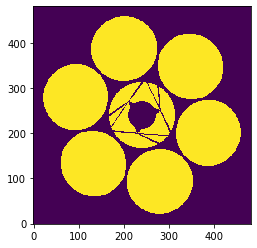

In [6]:
plt.imshow(GMTpup_model, interpolation='none', origin='lower')

## Pupil model verification with CEO
Verify that the pupil model generates the same pupil produced by CEO.

### Compare propagation to M1 vs propagation to exit pupil in CEO

In [7]:
gmt = ceo.GMT_MX()
gmt.M2_baffle = M2_baffle   
gmt.project_truss_onaxis = False  #-- to compare propagations below

gs = ceo.Source('V', rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25],
               rays_rot_angle=angle*np.pi/180)

Propagation through M1, M2, and onto exit pupil

In [8]:
gmt.reset()
gs.reset()
gmt.propagate(gs)

GMTpup_ceo_1 = gs.amplitude.host()

Propagation through M1 only

In [10]:
gmt.reset()
gs.reset()
xyz = gs.rays.coordinates.host()
gs.rays.gmt_m2_baffle(M2_baffle)
gmt.M1.trace(gs.rays)
GMTpup_ceo_2 = gs.rays.vignetting.host().reshape(nPx,nPx)

There is a small vignetting discrepancy due to numerical ray tracing errors between the two propagations above.

568.0


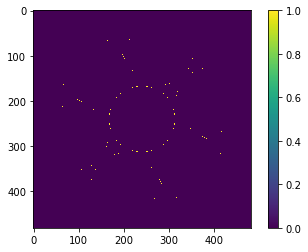

In [11]:
plt.imshow(GMTpup_ceo_2 - GMTpup_ceo_1, interpolation='none')
plt.colorbar()
print(np.sum(np.abs(GMTpup_ceo_1-GMTpup_ceo_2)))

### Compare pupil model to pupil produced by CEO
A perfect match occurs when stopping propagation at M1.

In [15]:
GMTpup_model_2 = gmt_pupil_model(nPx, du, M2_baffle_diam=M2_baffle, angle=angle, truss_shadows=False)

0.0


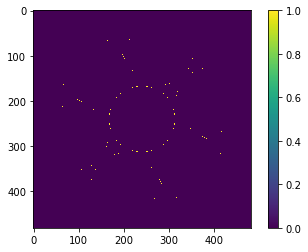

In [16]:
plt.imshow(GMTpup_model_2-GMTpup_ceo_1, interpolation='none')
plt.colorbar()
print(np.sum(np.abs(GMTpup_model_2-GMTpup_ceo_2)))

### Compare GMT pupils with truss shadows

In [17]:
GMTpup_model = gmt_pupil_model(nPx, du, M2_baffle_diam=M2_baffle, angle=angle, truss_shadows=True)

gmt.project_truss_onaxis = True
gmt.reset()
gs.reset()
gmt.propagate(gs)

GMTpup_ceo = gs.amplitude.host()

GMTpup_diff = GMTpup_model-GMTpup_ceo

Text(0.5, 1.0, 'difference')

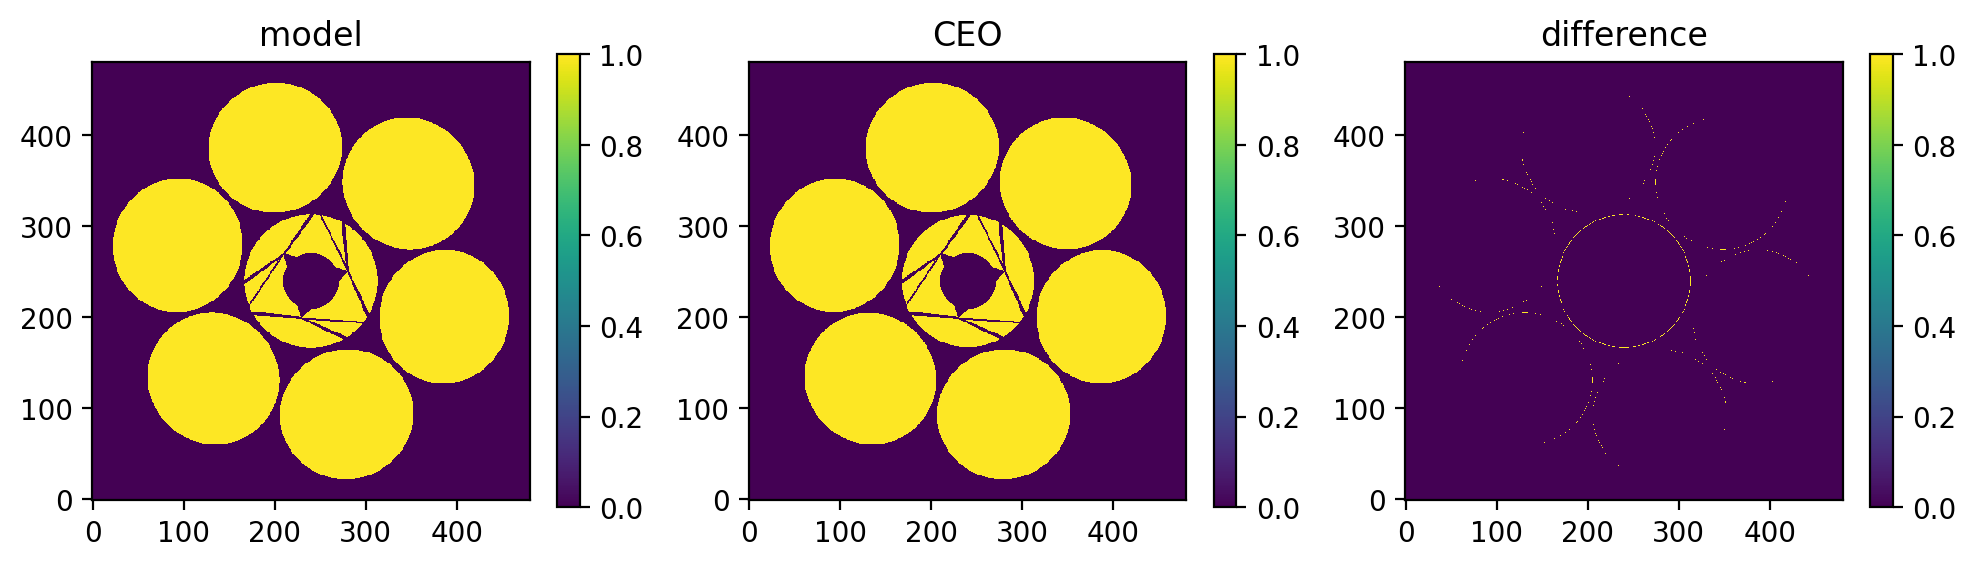

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches((12,3))
fig.dpi=200

im1 = ax1.imshow(GMTpup_model, interpolation='none', origin='lower')
clb1 = fig.colorbar(im1, ax=ax1)
ax1.set_title('model')

im2 = ax2.imshow(GMTpup_ceo, interpolation='none', origin='lower')
clb2 = fig.colorbar(im2, ax=ax2)
ax2.set_title('CEO')

im3 = ax3.imshow(GMTpup_diff, interpolation='none', origin='lower')
clb3 = fig.colorbar(im3, ax=ax3)
ax3.set_title('difference')

545.0


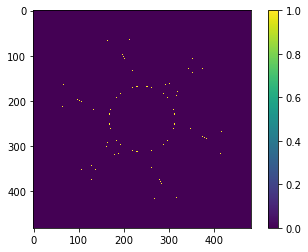

In [20]:
plt.imshow(GMTpup_diff, interpolation='none')
plt.colorbar()
print(np.sum(np.abs(GMTpup_diff)))